In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                      'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
                      'A13', 'A14', 'A15', 'y'],
                na_values=['?', 'nan'])

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
#Objective : classify "approved" or "denied" based on credit data

In [5]:
#Plotting PCA
#Check for Null / NA
df[df.isnull().any(axis=1)]
#drop
df.dropna(inplace=True)

#Check for Null / NA again to verify if the drop works
df[df.isnull().any(axis=1)]

#Describe the columns
df.describe()

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [6]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'y'],
      dtype='object')

In [8]:
df.isnull().any(axis=0)

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
y      False
dtype: bool

In [10]:
y = df.loc[:,'y']
X = df.loc[:,'A1':'A15']
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442


In [11]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
y       object
dtype: object

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'y'],
      dtype='object')

In [44]:
columns_to_encode = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13','y']

for i in columns_to_encode:
 enc_col = LabelEncoder()
 print(i)
 df[i+'_1']=enc_col.fit_transform(df[i])   
df.columns


df.dtypes
df.head()

A1
A4
A5
A6
A7
A9
A10
A12
A13
y


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A1_1,A4_1,A5_1,A6_1,A7_1,A9_1,A10_1,A12_1,A13_1,y_1
0,1,30.83,0.000,u,g,w,v,1.25,t,t,...,1,1,0,12,7,1,1,0,0,0
1,6,58.67,4.460,u,g,q,h,3.04,t,t,...,6,1,0,10,3,1,1,0,0,0
2,0,24.50,0.500,u,g,q,h,1.50,t,f,...,0,1,0,10,3,1,0,0,0,0
3,5,27.83,1.540,u,g,w,v,3.75,t,t,...,5,1,0,12,7,1,1,1,0,0
4,0,20.17,5.625,u,g,w,v,1.71,t,f,...,0,1,0,12,7,1,0,0,2,0


In [53]:
#Plotting PCA


columns_to_plot = ['A2', 'A3' , 'A8' ,'A11', 'A14','A15']
df_encoded = pd.DataFrame()
for j in columns_to_plot: 
 df_encoded[j] = df[j]

for j in columns_to_encode: 
 df_encoded[j+'_1'] = df[j+'_1']



In [54]:
df_encoded

,A2,A3,A8,A11,A14,A15,A1_1,A4_1,A5_1,A6_1,A7_1,A9_1,A10_1,A12_1,A13_1,y_1
0,30.83,0.000,1.250,1,202.0,0,1,1,0,12,7,1,1,0,0,0
1,58.67,4.460,3.040,6,43.0,560,6,1,0,10,3,1,1,0,0,0
2,24.50,0.500,1.500,0,280.0,824,0,1,0,10,3,1,0,0,0,0
3,27.83,1.540,3.750,5,100.0,3,5,1,0,12,7,1,1,1,0,0
4,20.17,5.625,1.710,0,120.0,0,0,1,0,12,7,1,0,0,2,0
5,32.08,4.000,2.500,0,360.0,0,0,1,0,9,7,1,0,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,0,1,0,11,3,1,0,1,0,0
7,22.92,11.585,0.040,0,80.0,1349,0,1,0,2,7,1,0,0,0,0
8,54.42,0.500,3.960,0,180.0,314,0,2,2,8,3,1,0,0,0,0
9,42.50,4.915,3.165,0,52.0,1442,0,2,2,12,7,1,0,1,0,0


In [77]:
df_encoded[df_encoded.y_1==0]

,A2,A3,A8,A11,A14,A15,A1_1,A4_1,A5_1,A6_1,A7_1,A9_1,A10_1,A12_1,A13_1,y_1
0,30.83,0.000,1.250,1,202.0,0,1,1,0,12,7,1,1,0,0,0
1,58.67,4.460,3.040,6,43.0,560,6,1,0,10,3,1,1,0,0,0
2,24.50,0.500,1.500,0,280.0,824,0,1,0,10,3,1,0,0,0,0
3,27.83,1.540,3.750,5,100.0,3,5,1,0,12,7,1,1,1,0,0
4,20.17,5.625,1.710,0,120.0,0,0,1,0,12,7,1,0,0,2,0
5,32.08,4.000,2.500,0,360.0,0,0,1,0,9,7,1,0,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,0,1,0,11,3,1,0,1,0,0
7,22.92,11.585,0.040,0,80.0,1349,0,1,0,2,7,1,0,0,0,0
8,54.42,0.500,3.960,0,180.0,314,0,2,2,8,3,1,0,0,0,0
9,42.50,4.915,3.165,0,52.0,1442,0,2,2,12,7,1,0,1,0,0


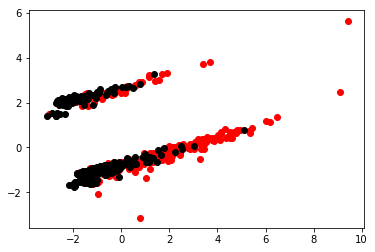

In [92]:
#Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_encoded.loc[:,'A2':'A13_1']
Y = df_encoded.loc[:,'y_1']

#if in doubt scale
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

X_scaled_2d = pca.fit_transform(X_scaled)

fig ,ax = plt.subplots()

#ax.scatter(X_scaled_2d[:,0],X_scaled_2d[:,1])

#ax.scatter(X_scaled_2d[:,0],X_scaled_2d[:,1],c=Y)

#print(y==0)
#print(X_scaled_2d[Y==0])
ax.scatter(X_scaled_2d[Y==0,0],X_scaled_2d[Y==0,1],color='red',label='+')
ax.scatter(X_scaled_2d[Y==1,0],X_scaled_2d[Y==1,1],color='black',label='-')
plt.show()




In [89]:
X.head()

,A2,A3,A8,A11,A14,A15,A1_1,A4_1,A5_1,A6_1,A7_1,A9_1,A10_1,A12_1,A13_1
0,30.83,0.000,1.25,1,202.0,0,1,1,0,12,7,1,1,0,0
1,58.67,4.460,3.04,6,43.0,560,6,1,0,10,3,1,1,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,10,3,1,0,0,0
3,27.83,1.540,3.75,5,100.0,3,5,1,0,12,7,1,1,1,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,12,7,1,0,0,2


In [94]:
#Train without GridSearchCV
from sklearn.model_selection import train_test_split
train_x , test_x , train_y, test_y = train_test_split(X,Y,test_size=.1,random_state=40)

In [112]:
scaler_x = StandardScaler()

#transform and fit
x_scaled_train = scaler_x.fit_transform(train_x)
#only transform --don't fit
x_scaled_test   = scaler_x.transform(test_x)

    

In [113]:
from sklearn.linear_model import LogisticRegression,SGDRegressor
log = LogisticRegression()
log.fit(x_scaled_train,train_y)
pred_scaled = log.predict(x_scaled_train)
prob_scaled = log.predict_proba(x_scaled_train)

print(pred_scaled)
print(prob_scaled)

[0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 1 1 0 1 1 1 

In [114]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid={'penalty':['l1','l2'],
           'tol':[1e-1,1e-2,1e-4,1e-6]}

gs = GridSearchCV(LogisticRegression(random_state=42),param_grid,verbose=True)
gs.fit(x_scaled_train,train_y)

print(gs.best_params_)

y_pred=gs.predict(x_scaled_test)
y_pred=gs.predict_proba(x_scaled_test)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'tol': 0.0001, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
